In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from pandas import Timedelta
import matplotlib.patches as patches

# File paths
file_path = ["data.txt"]


# Create a list to store the dataframes
dataframes = []


# Iterate over the files
for line in file_path:
    # Import the file skipping the header and footer lines
    df = pd.read_csv(line, engine='python', delim_whitespace=True)
    dataframes.append(df)


In [2]:
data1 = np.array(dataframes[0])

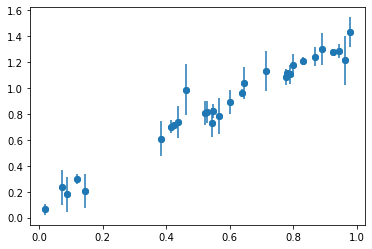

In [3]:
plt.scatter(data1[:,0], data1[:,1])
plt.errorbar(data1[:,0], data1[:,1], yerr=data1[:,2], fmt='o')
plt.show()

A: 0.06881061961384032, B: 1.6930701599532776, C: -0.42081605412547907





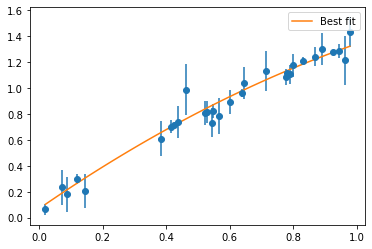

In [27]:
from scipy.optimize import minimize

# Save cols as vars
x = data1[:, 0]
y = data1[:, 1]
std_dev = data1[:, 2]

# Define the polynomial
def polynomial_eq(params, x):
    a, b, c = params
    return a + b*x + c*x**2

#Define function for MLE
def mle_function(params, x, y, std_dev):
    residuals = y - polynomial_eq(params, x)
    return np.sum((residuals / std_dev)**2)

#Guess a, b, c
initial_guess = [0, 0, 0]

#Optimize
result = minimize(mle_function, initial_guess, args=(x, y, std_dev))

#store params
a_mle, b_mle, c_mle = result.x

print(f"A: {a_mle}, B: {b_mle}, C: {c_mle}")
print('\n\n')


fig, ax = plt.subplots()

#generate x-values to plot
x_seq = np.linspace(min(x), max(x), 100)

#include original error bars
ax.errorbar(x, y, yerr=std_dev, fmt='o')

ax.plot(x_seq, polynomial_eq(result.x, x_seq), label='Best fit')

ax.legend()


plt.show()